# Exploratory Data Analysis

The purpose of this notebook is to visually analyse prepared data and draw conclusions.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd

# let matplotlib plots be part of Jupyter Notebook
%matplotlib inline

# set up higher resolution for matplotlib plots
%config InlineBackend.figure_format = 'retina'

## Load data

In [2]:
# set up paths to created datasets
filepath = os.path.join(os.getcwd(), '..', 'data', 'processed', 'bike_availability.csv')

In [3]:
# load data
bike_availability_df = pd.read_csv(filepath)

bike_availability_df = bike_availability_df.set_index('Timestamp')

## Quick verification of datasets

### Dataset with soft deleted records

In [4]:
bike_availability_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1215455 entries, 2019-10-25 15:20:00 to 2019-12-06 20:50:00
Data columns (total 2 columns):
Available Bikes        1215455 non-null int64
Bike Station Number    1215455 non-null int64
dtypes: int64(2)
memory usage: 27.8+ MB


In [5]:
bike_availability_df.head()

,Available Bikes,Bike Station Number
Timestamp,,
2019-10-25 15:20:00,3,15171
2019-10-25 15:20:00,4,15162
2019-10-25 15:20:00,0,15161
2019-10-25 15:20:00,4,15160
2019-10-25 15:20:00,6,15159


In [6]:
bike_availability_df.tail()

,Available Bikes,Bike Station Number
Timestamp,,
2019-12-06 20:50:00,2,15029
2019-12-06 20:50:00,2,15028
2019-12-06 20:50:00,3,15027
2019-12-06 20:50:00,2,15037
2019-12-06 20:50:00,0,15200


### Unique bike stations

In [7]:
print(sorted(bike_availability_df['Bike Station Number'].unique()))

[15001, 15002, 15003, 15004, 15005, 15006, 15007, 15008, 15009, 15010, 15011, 15012, 15013, 15014, 15015, 15016, 15017, 15018, 15019, 15020, 15021, 15022, 15023, 15024, 15025, 15026, 15027, 15028, 15029, 15030, 15031, 15032, 15033, 15034, 15035, 15036, 15037, 15038, 15039, 15040, 15041, 15042, 15043, 15044, 15045, 15046, 15047, 15048, 15049, 15050, 15051, 15052, 15053, 15054, 15055, 15056, 15057, 15058, 15059, 15060, 15061, 15062, 15063, 15064, 15065, 15066, 15067, 15068, 15069, 15070, 15071, 15072, 15073, 15074, 15075, 15076, 15077, 15078, 15079, 15080, 15081, 15082, 15083, 15084, 15085, 15086, 15087, 15088, 15089, 15090, 15091, 15092, 15093, 15094, 15095, 15096, 15097, 15098, 15099, 15100, 15101, 15102, 15103, 15104, 15105, 15106, 15107, 15108, 15109, 15110, 15111, 15112, 15113, 15114, 15115, 15116, 15117, 15118, 15119, 15120, 15121, 15122, 15123, 15124, 15125, 15126, 15127, 15128, 15129, 15130, 15131, 15132, 15133, 15134, 15135, 15136, 15137, 15138, 15139, 15140, 15141, 15142, 15143

### Pivot data

In [8]:
df = bike_availability_df.pivot_table(
    values='Available Bikes', 
    index='Timestamp', 
    columns='Bike Station Number')

# change column name type (from int to string)
df.columns = df.columns.astype(str)

df = df.fillna(0)
df

Bike Station Number,15001,15002,15003,15004,15005,15006,15007,15008,15009,15010,...,15194,15195,15196,15197,15198,15199,15200,15251,15252,15253
Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-10-25 15:20:00,3.0,11.0,3.0,37.0,1.0,5.0,1.0,9.0,6.0,2.0,...,5.0,1.0,1.0,2.0,2.0,5.0,2.0,5.0,4.0,3.0
2019-10-25 15:30:00,4.0,3.0,3.0,37.0,1.0,3.0,2.0,9.0,4.0,2.0,...,5.0,2.0,0.0,1.0,3.0,5.0,1.0,6.0,5.0,2.0
2019-10-25 15:40:00,5.0,3.0,1.0,36.0,1.0,2.0,2.0,7.0,3.0,2.0,...,5.0,2.0,0.0,3.0,3.0,4.0,1.0,5.0,5.0,2.0
2019-10-25 15:50:00,4.0,5.0,1.0,39.0,1.0,1.0,2.0,7.0,3.0,2.0,...,5.0,4.0,0.0,3.0,4.0,3.0,1.0,2.0,5.0,2.0
2019-10-25 16:00:00,4.0,8.0,5.0,40.0,2.0,1.0,2.0,7.0,2.0,1.0,...,5.0,4.0,0.0,2.0,3.0,3.0,1.0,3.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-06 20:10:00,1.0,1.0,1.0,10.0,1.0,0.0,0.0,2.0,1.0,1.0,...,1.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,5.0,1.0
2019-12-06 20:20:00,1.0,1.0,1.0,10.0,1.0,0.0,0.0,2.0,1.0,1.0,...,1.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,5.0,1.0
2019-12-06 20:30:00,1.0,1.0,1.0,10.0,1.0,0.0,0.0,2.0,1.0,1.0,...,1.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,5.0,1.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5989 entries, 2019-10-25 15:20:00 to 2019-12-06 20:50:00
Columns: 203 entries, 15001 to 15253
dtypes: float64(203)
memory usage: 9.3+ MB


In [10]:
df.isnull().sum().sum()

0

## Visual inspection

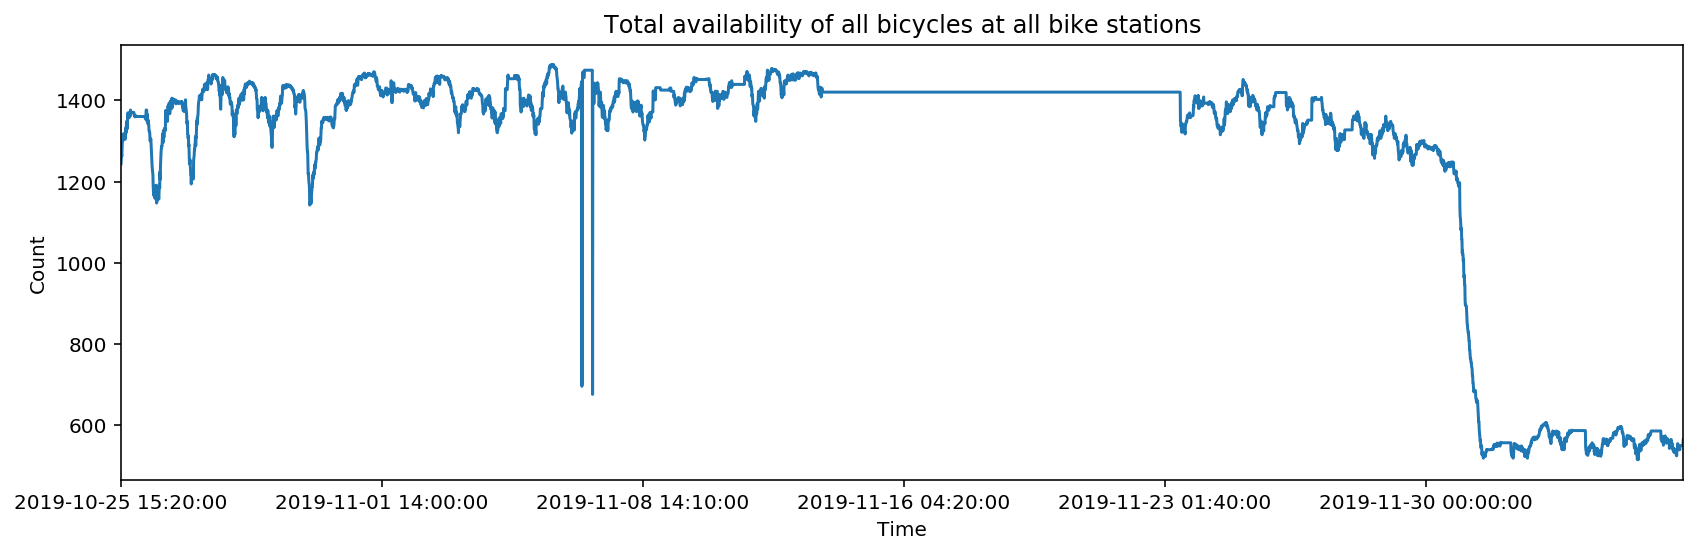

In [11]:
ax = df.sum(axis=1).plot(figsize=(14,4))
ax.set_title('Total availability of all bicycles at all bike stations')
ax.set_xlabel('Time')
ax.set_ylabel('Count');

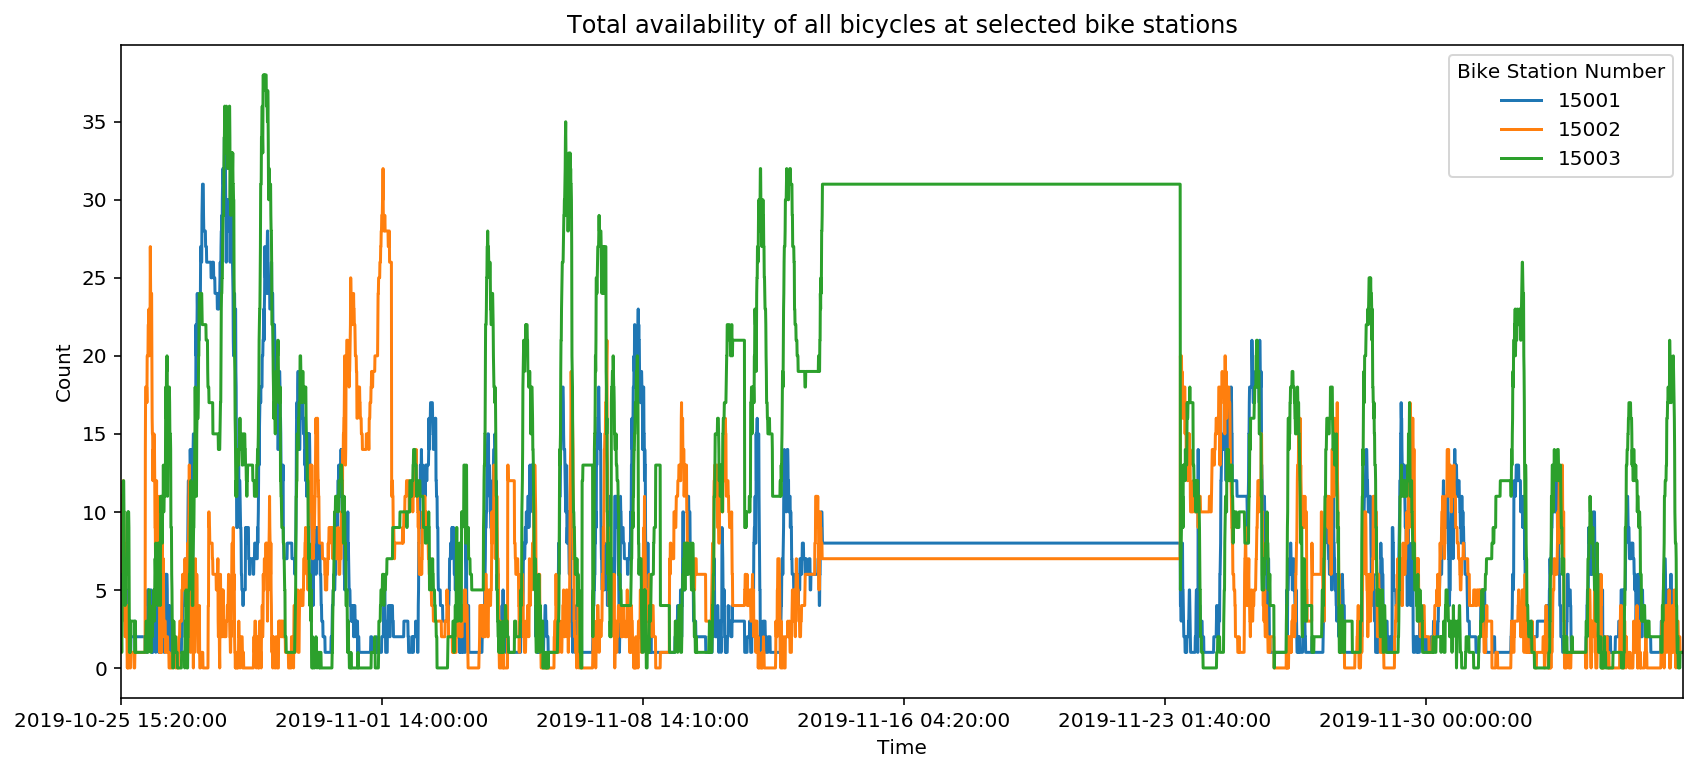

In [12]:
ax = df[['15001', '15002', '15003']].plot(figsize=(14,6))
ax.set_title('Total availability of all bicycles at selected bike stations')
ax.set_xlabel('Time')
ax.set_ylabel('Count');